## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### reading CSVs


In [2]:
gender_submission_pd = pd.read_csv('data/gender_submission.csv')
test_pd = pd.read_csv('data/test.csv')
train_pd = pd.read_csv('data/train.csv')


In [3]:
display(train_pd.head())
display(test_pd.head())
display(gender_submission_pd.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
display(train_pd.info())
display(test_pd.info())
display(gender_submission_pd.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


None

### Train and test csv have 1 column in difference: "Survived". Ill separate this Survived column

In [5]:
survived = train_pd['Survived']
train_pd.drop('Survived', axis=1, inplace=True)
train_pd.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### combining both datasets

In [6]:
train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd], axis=0).reset_index(drop=True)

In [7]:
display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


Text(0.5, 1.0, 'Missing values heatmap')

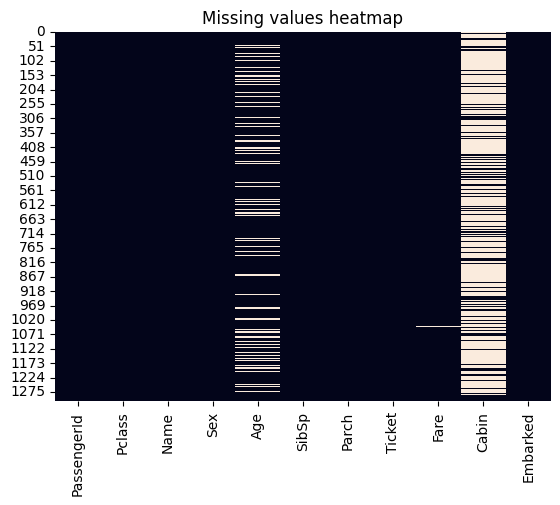

In [8]:
# Checking NULL values
#print(combined_pd.info())
print(combined_pd.isnull().sum())
sns.heatmap(combined_pd.isnull(), cbar = False).set_title("Missing values heatmap")

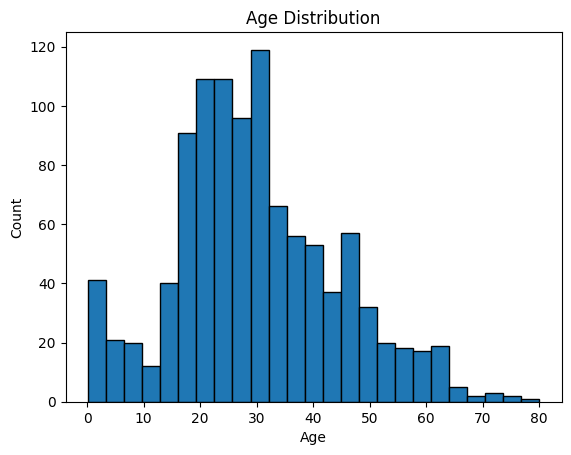

In [9]:
#plotting ages

plt.hist(combined_pd['Age'], bins=25, edgecolor='black')
plt.title('Age Distribution'), plt.xlabel('Age'), plt.ylabel('Count')
plt.show()



In [10]:
class_age = combined_pd[['Pclass', 'Age']].groupby('Pclass').mean()
class_age

,Age
Pclass,
1,39.159930
2,29.506705
3,24.816367


In [11]:
#filling missing values in Age column

def fill_age(row):
    if pd.isnull(row['Age']):
        return class_age.loc[row['Pclass']]
    else:
        return row['Age']

combined_pd['Age'] = combined_pd.apply(fill_age, axis=1)
combined_pd.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

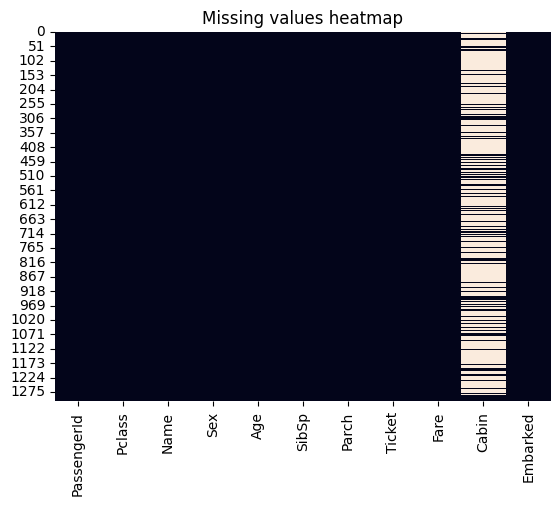

In [12]:
#display NaN fare row
combined_pd[combined_pd['Fare'].isnull()]

#filling missing values in Fare column with the same embarked class and area

sim_fares = combined_pd[(combined_pd['Embarked'] == 'S') & (combined_pd['Pclass'] == 3)]['Fare']
#median is less susceptible to outliers
sim_fares.median()

combined_pd.fillna({'Fare': sim_fares.median()}, inplace=True)
sns.heatmap(combined_pd.isnull(), cbar = False).set_title("Missing values heatmap")


In [13]:
#display NaN embark row
display(combined_pd[combined_pd['Embarked'].isnull()])

#filling missing values in Fare column with the same embarked class and area

sim_embarked = combined_pd[(combined_pd['Pclass'] == 1) & (combined_pd['Fare'] <=90) & (combined_pd['Fare'] >= 70)]['Embarked']
#median is less susceptible to outliers
print(sim_embarked.value_counts())
combined_pd.fillna({'Embarked': 'C'}, inplace=True)



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


In [15]:
combined_pd['Cabin'].fillna('M', inplace=True)
combined_pd['Cabin'] = combined_pd['Cabin'].str[0]

idx = np.where(combined_pd['Cabin'] == 'T')[0]
combined_pd.loc[idx, 'Cabin'] = 'M'

C:\Users\brics\AppData\Local\Temp\ipykernel_27860\2720954707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_pd['Cabin'].fillna('M', inplace=True)


In [16]:
display(combined_pd)
print(combined_pd.isnull().sum())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,"Age 24.816367 Name: 3, dtype: float64",0,0,A.5. 3236,8.0500,M,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S
1307,1308,3,"Ware, Mr. Frederick",male,"Age 24.816367 Name: 3, dtype: float64",0,0,359309,8.0500,M,S
